### Analyzing crashes by mode
This notebook contains the code for analyzing crash data by mode

This requires the following data resources:
1. Crash data - Run the `crash_update.py` script to obtain these data
2. Fatality data - Same as above, run `crash_update.py` to obtain

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

crash_df = pd.read_csv('../data/crash.csv')
fatality_df = pd.read_csv('../data/fatality.csv')
# convert timestamp to datetime
crash_df['dispatch_ts'] = pd.to_datetime(crash_df['dispatch_ts'])
fatality_df['date_time'] = pd.to_datetime(fatality_df['date_time'])

In [3]:
# # keeping - some strangely high numbers with a specific geocode
# # maybe defaults?
# max_id = crash_df.groupby(['lat', 'long']).size().sort_values().index[-1]
# crash_df.groupby(['lat', 'long']).size().sort_values().describe()
# # lookup max_id geometry
# crash_df[crash_df['lat'] == max_id[0]][crash_df['long'] == max_id[1]]
# # these are strange, but there's a fair number of them

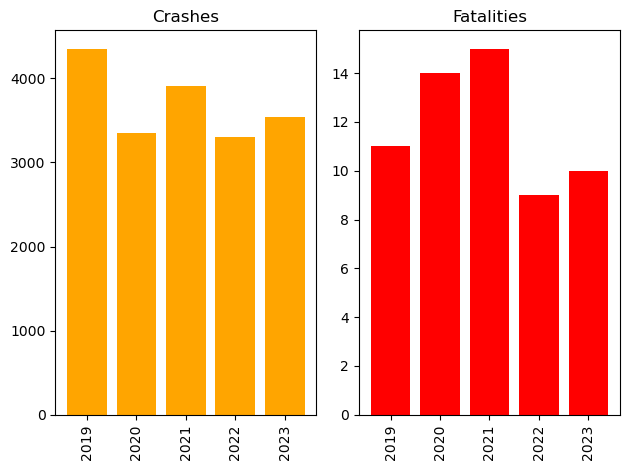

In [23]:
# look at crashes per year
# convert to datetime
crash_df['year'] = crash_df['dispatch_ts'].dt.year
# same treatment for fatalities
fatality_df['year'] = fatality_df['date_time'].dt.year

# do the above visuals but in one figure
fig, ax = plt.subplots(1, 2)
# crashes
g_df = crash_df.groupby('year').size()
ax[0].bar(g_df.loc[2019:2023].index, g_df.loc[2019:2023], color='orange')
ax[0].set_ylabel('')
ax[0].set_title('Crashes')
# fatalities
g_df = fatality_df.groupby('year').size()
ax[1].bar(g_df.loc[2019:2023].index, g_df.loc[2019:2023], color='red')
ax[1].set_ylabel('')
ax[1].set_title('Fatalities')
# rotate x axis labels
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
# show all x axis labels
plt.tight_layout()


In [19]:
# what pct more crashes 2020 vs 2019
crash_2019 = crash_df[crash_df['year'] == 2019].shape[0]
crash_2020 = crash_df[crash_df['year'] == 2020].shape[0]
print((crash_2020 - crash_2019) / crash_2019)
# what pct more fatalities 2020 vs 2019
fatality_2019 = fatality_df[fatality_df['year'] == 2019].shape[0]
fatality_2020 = fatality_df[fatality_df['year'] == 2020].shape[0]
print((fatality_2020 - fatality_2019) / fatality_2019)

-0.23023897058823528
0.2727272727272727


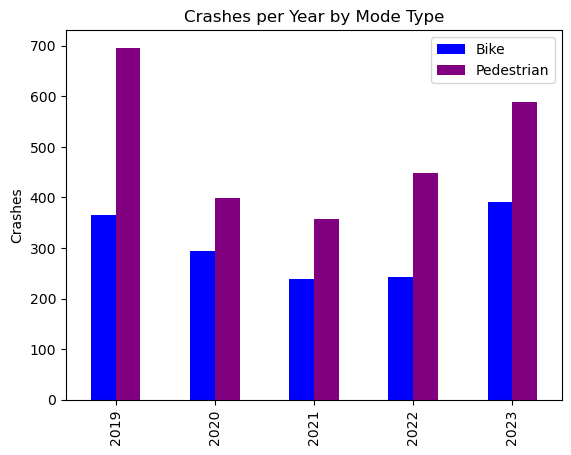

In [36]:
# break this down by mode type
ax = crash_df.groupby(['year', 'mode_type']).size().unstack().loc[2019:2023, ['bike', 'ped']].plot(
    kind='bar', color=['blue', 'purple'])
# add labels
ax.set_ylabel('Crashes')
ax.set_xlabel('')
ax.set_title('Crashes per Year by Mode Type')
ax.legend(title='Travel mode')
ax.legend(['Bike', 'Pedestrian'])

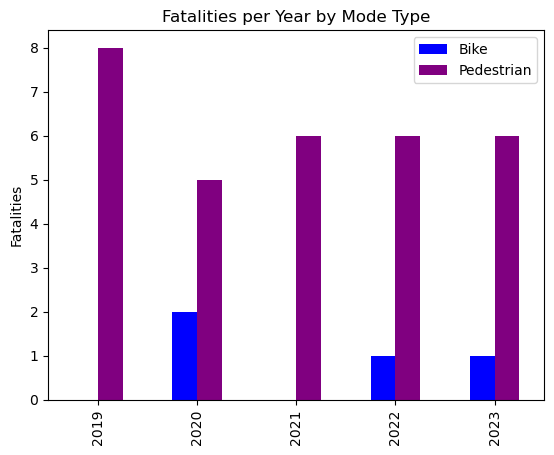

In [35]:
# same for fatalities
ax = fatality_df.groupby(['year', 'mode_type']).size().unstack().loc[2019:2023, ['bike', 'ped']].plot(
    kind='bar', color=['blue', 'purple'])
# add labels
ax.set_ylabel('Fatalities')
ax.set_xlabel('')
ax.set_title('Fatalities per Year by Mode Type')
ax.legend(title='Travel mode')
ax.legend(['Bike', 'Pedestrian'])


In [37]:
# what pct more bike crashes 2023 vs 2022
mode_year = crash_df.groupby(['year', 'mode_type']).size().unstack().loc[2019:2023, ['bike', 'ped']]
print((mode_year.loc[2023, 'bike'] - mode_year.loc[2022, 'bike']) / mode_year.loc[2022, 'bike'])
# same for peds
print((mode_year.loc[2023, 'ped'] - mode_year.loc[2022, 'ped']) / mode_year.loc[2022, 'ped'])


0.6157024793388429
0.3125


year
2019    863
2020    826
2021    765
2022    710
2023    780
2024    646
dtype: int64
-0.1717948717948718


/var/folders/_k/42sqpt052kz96fmjll5__xxw0000gn/T/ipykernel_23030/2226707168.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crash_df['month_year'] = crash_df['dispatch_ts'].dt.to_period('M')


Text(0.5, 1.0, 'Crashes per Year 2019-2024, first 3 months')

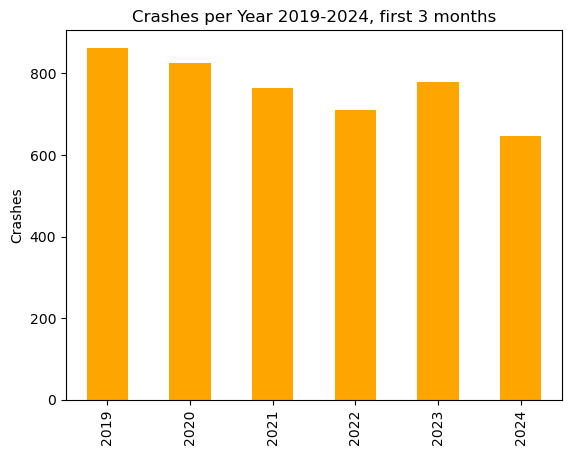

In [40]:
# is 2024 showing signs of continuity with this pattern?
# get the max month
crash_df['month_year'] = crash_df['dispatch_ts'].dt.to_period('M')
max_month = crash_df['month_year'].max().month
less_max_month = crash_df[crash_df.dispatch_ts.dt.month<=max_month]
g_less = less_max_month.groupby('year').size()
ax = g_less.loc[2019:2024].plot(kind='bar', color='orange')
print(g_less)
print((g_less.loc[2024]-g_less.loc[2023])/g_less.loc[2023])
# add labels
ax.set_ylabel('Crashes')
ax.set_xlabel('')
ax.set_title(f'Crashes per Year 2019-2024, first {max_month} months')

mode_type  bike  ped
year                
2019         44  161
2020         41  125
2021         23   70
2022         30   94
2023         33  150
2024         56   11
0.696969696969697


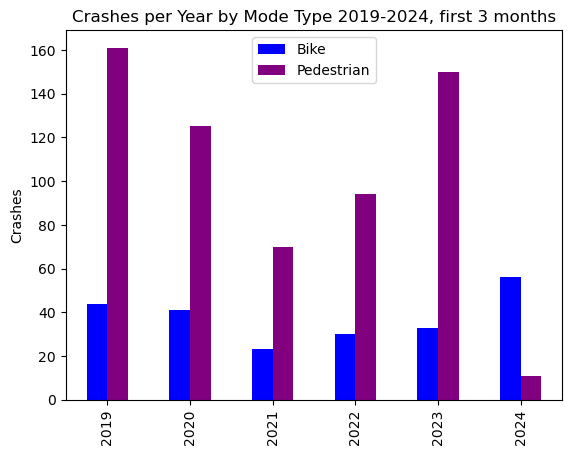

In [42]:
# break this down by mode type
g_less_mode = less_max_month.groupby(['year', 'mode_type']).size().unstack().loc[:, ['bike', 'ped']]
ax = g_less_mode.plot(kind='bar', color=['blue', 'purple'])
print(g_less_mode)
print((g_less_mode.loc[2024, 'bike']-g_less_mode.loc[2023, 'bike'])/g_less_mode.loc[2023, 'bike'])
# add labels
ax.set_ylabel('Crashes')
ax.set_xlabel('')
ax.set_title(f'Crashes per Year by Mode Type 2019-2024, first {max_month} months')
ax.legend(title='Travel mode')
ax.legend(['Bike', 'Pedestrian'])
